In [11]:
import sys
import os
home=os.getcwd()
sys.path.append(home+'/Functions')
from ChargeDataSet import *
from ShowDF import *
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
DataSetName='12111.mzML'

In [4]:
DataSet=ChargeDataSet(DataSetName)

In [7]:
dataSet=DataSet[0]

In [58]:
len(Spectrum)

270

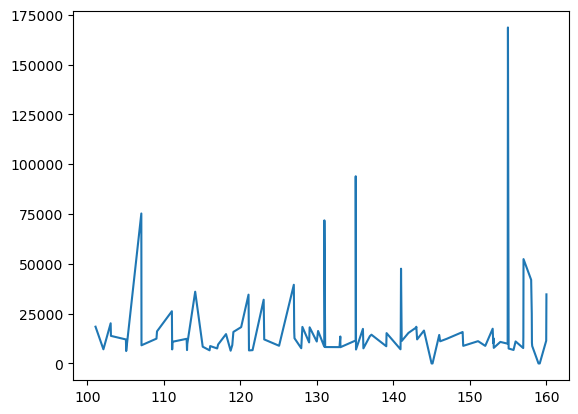

In [59]:
plt.plot(Spectrum[:100,0],Spectrum[:100,1])

In [ ]:
import numpy as np
import gc
def ModulesDetMax(MaxID,AdjacencyMatrix,VisitVector,Module=[],deep=0,MaxDeep=3):
#This is function also check for neightboors, but not more than 'MaxDeep', which is not a problem, as this function is just a first step in the clustering    
    CurrentModule=AdjacencyMatrix[MaxID]
    VisitVector[MaxID]=VisitVector[MaxID]+1
    if len(CurrentModule)>1:    
        VisitVector[CurrentModule]=VisitVector[CurrentModule]+1
        for KernelID in CurrentModule:
            Module.append(KernelID)
            if deep<MaxDeep and VisitVector[KernelID]<2:                
                Module=ModulesDetMax(MaxID=KernelID,AdjacencyMatrix=AdjacencyMatrix,VisitVector=VisitVector,deep=deep+1,MaxDeep=MaxDeep,Module=Module)        
    del CurrentModule
    del deep
    gc.collect()
    return Module

In [ ]:
import numpy as np
from ModulesDetMax import *
import gc
def MaxIntCentroids(Spectrum,AdjacencyMatrix,KernelIDs=[],features=0,FeaturesNumber=500,MinSignals=3,MinIntKernel=3e4,MaxDeep=3):        
    MaxInt=MinIntKernel*1.5
    VisitVector=np.zeros(len(AdjacencyMatrix))
    while features<FeaturesNumber and MaxInt>MinIntKernel:
        MaxInt=np.max(Spectrum[:,1])
        Loc=np.where(Spectrum[:,1]==MaxInt)[0][0]
        Module=ModulesDetMax(MaxID=Loc,AdjacencyMatrix=AdjacencyMatrix,VisitVector=VisitVector,Module=[Loc],MaxDeep=MaxDeep)       
        del Loc
        CleanModule=list(set(Module))
        if len(CleanModule)>MinSignals:
            KernelIDs.append(CleanModule)
            features+=1
        Spectrum[Module,1]=0
        del Module
        gc.collect()
    del MaxInt     
    gc.collect()
    if features==FeaturesNumber:
        print('There are more features')
    return KernelIDs

In [55]:
Spectrum=np.array(dataSet.get_peaks()).T
#Add an intensity Filter, mz range and RT range...

519.1382607166984 513.3444388277895 524.9320826056072


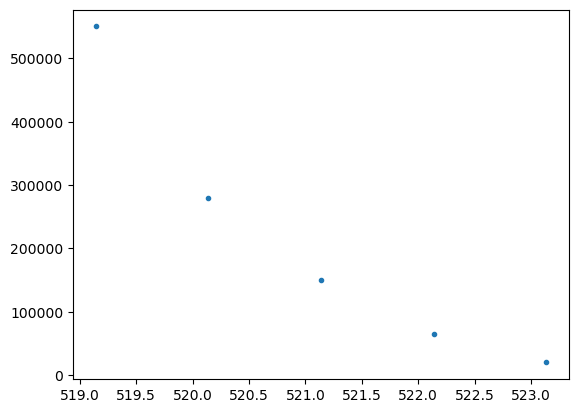

159.01308288570038 158.8268800452786 159.19928572612216


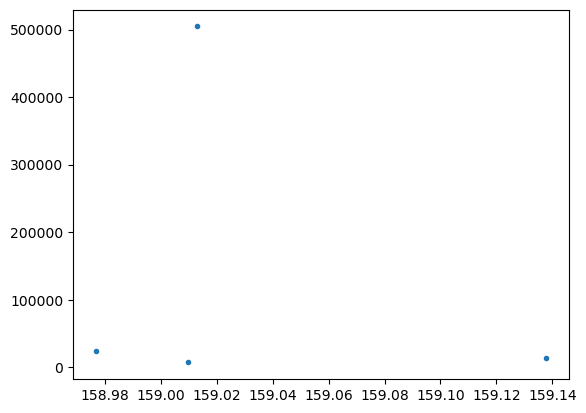

445.1197553768126 445.0893973024023 445.15011345122286


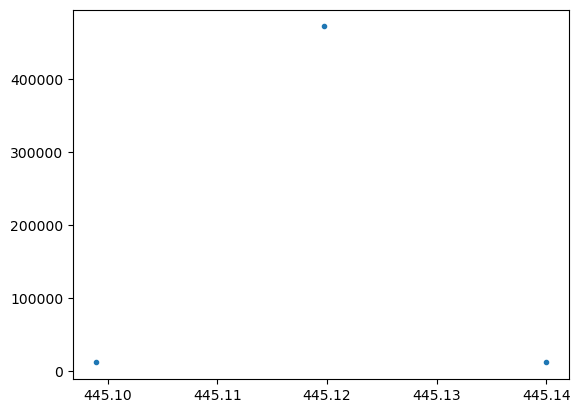

172.99233050338032 172.92106615291326 173.06359485384738


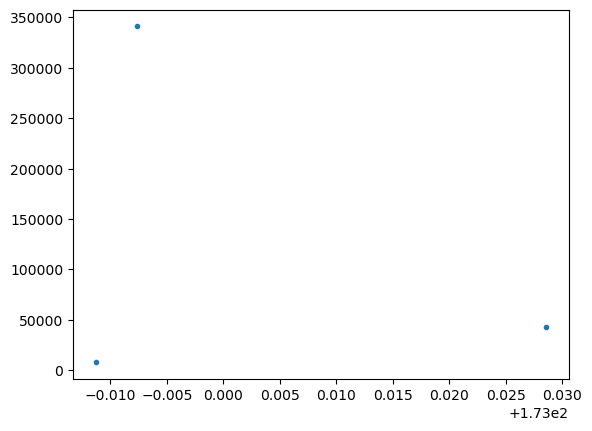

144.997468026406 144.753970305704 145.24096574710802


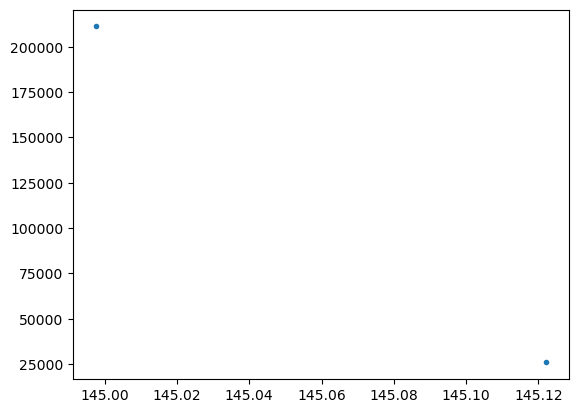

In [56]:
FractionCut=0.1353352832366127 #np.exp(-4/2) The relative intensity after 2 standard deviation, if the signal behave normal
FeaturesNumber=10
MinIntKernel=3e5
MaxInt=1.5*MinIntKernel
features=0
SafetyFactor=4
while features<FeaturesNumber and MaxInt>MinIntKernel:
    MaxInt=np.max(Spectrum[:,1])
    Loc=np.where(Spectrum[:,1]==MaxInt)[0][0]
    mz=Spectrum[Loc,0]
    CutInt=MaxInt*FractionCut
    LocCut=np.where((Spectrum[:,1]<CutInt)&(Spectrum[:,0]>mz))[0][0] #This would be the mz 2 standard deviations at the right of the maximum
    mz2Sig=Spectrum[LocCut,0]
    Int2Sig=Spectrum[LocCut,1]
    DataFractionCut=MaxInt/Int2Sig
    SigmaDist=np.sqrt(2*np.log(DataFractionCut))
    Deltamz=mz2Sig-mz
    Sigma=Deltamz/SigmaDist
    Light_mz=mz-SafetyFactor*Sigma
    Heavy_mz=mz+SafetyFactor*Sigma
    print(mz,Light_mz,Heavy_mz)    
    PeakLoc=np.where((Spectrum[:,0]>Light_mz)&(Spectrum[:,0]<Heavy_mz))[0]
    #plt.plot(Spectrum[PeakLoc,0],Spectrum[PeakLoc,1],'.')
   # plt.show()
    Spectrum[PeakLoc,1]=0    
    features+=1

In [57]:
features

5

In [ ]:
Can I quickly stimate the standard deviation? Maybe with some points around my 

In [50]:
for x in Spectrum:
    print(x)

[  101.05963608 18464.734375  ]
[ 102.09130568 7115.13476562]
[  103.03889251 20167.74414062]
[  103.07523252 13854.85839844]
[  105.03341719 12065.36328125]
[ 105.07001495 6240.75927734]
[  107.04904233 75294.1171875 ]
[ 107.07021577 9131.79296875]
[  109.02828641 12466.17773438]
[  109.10114597 16138.37597656]
[  111.04401059 26227.76953125]
[ 111.08042084 7059.06494141]
[  111.11678719 10888.24414062]
[  112.97132805 12380.11425781]
[ 113.02334267 6729.79394531]
[ 113.05961013 9852.91796875]
[  114.09131547 36024.71875   ]
[ 115.07527477 8428.13183594]
[ 115.96976236 6607.84179688]
[ 116.0527827  8744.33398438]
[ 116.96612921 7544.25390625]
[ 117.09098038 9536.31445312]
[  118.12264433 14749.70605469]
[ 118.724566   6408.16064453]
[ 118.94250753 9258.58789062]
[  119.08540437 15840.89160156]
[  120.10181599 18253.29492188]
[  121.06467439 34546.203125  ]
[ 121.12377233 6557.72265625]
[ 121.59137891 6690.15527344]
[  123.0440444  32002.34179688]
[  123.11677278 12070.67675781]
[ 125.